# **Install Libary**

In [ ]:
!pip install pyLDAvis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 13.3 MB/s eta 0:00:00


In [ ]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 17.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 8.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# **Loading Liabary and Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [2]:
# Mount your Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read the dataset from the specified path
df = pd.read_csv('/content/drive/MyDrive/ML project/Final /fake_real_vector.csv', sep=',', encoding='utf-8', quotechar='"')
df.head()

,text,type,processed_Text,vector
0,WASHINGTON- The head of a conservative Republi...,True,washington reuter head conservative republic...,[-0.81997824 0.5995497 -2.5212972 0.661411...
1,WASHINGTON- Transgender people will be allowed...,True,washington reuters transgender people allow ...,[-6.8455237e-01 7.6636398e-01 -1.6749181e+00 ...
2,WASHINGTON- The special counsel investigation ...,True,washington reuter special counsel investigat...,[ 1.08025201e-01 6.19717240e-01 -1.75755990e+...
3,WASHINGTON- Trump campaign adviser George Papa...,True,washington reuters trump campaign adviser ge...,[-3.90371442e-01 -2.06498355e-01 -1.27466476e+...
4,SEATTLE/WASHINGTON- President Donald Trump cal...,True,seattlewashington reuters president donald t...,[-6.48751736e-01 -4.65459138e-01 -1.50599909e+...


# **Models Selection**

In [ ]:
import numpy as np

# Function to convert string representations to numpy arrays
def parse_vector_string(vector_string):
    if isinstance(vector_string, str):
        # Remove square brackets and split by whitespace
        values = vector_string[1:-1].split()
        # Convert values to floats and return numpy array
        return np.array(values, dtype=float)
    elif vector_string is None:
        # If the input is None, return None
        return None
    else:
        # If the input is already a numpy array, return it as is
        return vector_string

# Convert 'vector' column to numpy arrays
df['vector'] = df['vector'].apply(parse_vector_string)

# Check the type of the 'vector' column after conversion
print(df['vector'].apply(type).unique())

[<class 'numpy.ndarray'> <class 'float'>]


In [ ]:
import numpy as np

# Function to convert string representations to numpy arrays
def parse_vector_string(vector_string):
    if isinstance(vector_string, str):
        # Remove square brackets and split by whitespace
        values = vector_string[1:-1].split()
        # Convert values to floats and return numpy array
        return np.array(values, dtype=float)
    elif vector_string is None:
        # If the input is None, return None
        return None
    else:
        # If the input is already a numpy array, return it as is
        return vector_string

# Convert 'vector' column to numpy arrays
df['vector'] = df['vector'].apply(parse_vector_string)

# Check the type of the 'vector' column after conversion
print(df['vector'].apply(type).unique())

[<class 'numpy.ndarray'>]


In [ ]:
import numpy as np

# Function to convert string representations to numpy arrays
def parse_vector_string(vector_string):
    if isinstance(vector_string, str):
        # Remove square brackets and split by whitespace
        values = vector_string[1:-1].split()
        # Convert values to floats and return numpy array
        return np.array(values, dtype=float)
    elif vector_string is None:
        # If the input is None, return None
        return None
    else:
        # If the input is already a numpy array, return it as is
        return vector_string

# Convert 'vector' column to numpy arrays
df['vector'] = df['vector'].apply(parse_vector_string)

# Check the type of the 'vector' column after conversion
print(df['vector'].apply(type).unique())

[<class 'numpy.ndarray'>]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Padding or truncating function to ensure all vectors have the same length
def pad_or_truncate_vector(vector, length):
    if isinstance(vector, np.ndarray):
        if len(vector) < length:
            # Pad vector with zeros if it's shorter than the specified length
            return np.pad(vector, (0, length - len(vector)))
        elif len(vector) > length:
            # Truncate vector if it's longer than the specified length
            return vector[:length]
        else:
            return vector
    else:
        # Return a zero-filled vector if the input is not a numpy array
        return np.zeros(length)

# Define the desired length for the vectors
max_length = 100  # Adjust this value according to your data

# Pad or truncate vectors to the desired length
df['vector'] = df['vector'].apply(pad_or_truncate_vector, length=max_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['vector'], df['type'], test_size=0.2, random_state=42)

# List of classifiers to compare
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
    #"Multinomial Naive Bayes": MultinomialNB() # used for features representing counts or frequencies, where negative values don't make sense.
}

# Iterate over each classifier
for name, classifier in classifiers.items():
    print(f"--- {name} ---")

    # Train the model on the training data
    classifier.fit(list(X_train), y_train)

    # Predict on the testing data
    y_pred = classifier.predict(list(X_test))

--- Logistic Regression ---
--- Random Forest ---
--- Decision Tree ---
--- Support Vector Machine ---
--- Gradient Boosting ---


In [ ]:
import warnings

# Iterate over each classifier
for name, classifier in classifiers.items():
    print(f"--- {name} ---")

    # Train the model on the training data
    classifier.fit(list(X_train), y_train)

    # Predict on the testing data
    y_pred = classifier.predict(list(X_test))

    # Print the classification report without warnings
    with np.errstate(divide='ignore'):
        print(classification_report(y_test, y_pred, zero_division=1))


--- Logistic Regression ---
              precision    recall  f1-score   support

        Fake       0.95      0.94      0.95      4650
        True       0.94      0.95      0.95      4330

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980

--- Random Forest ---
              precision    recall  f1-score   support

        Fake       0.96      0.97      0.96      4650
        True       0.96      0.96      0.96      4330

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980

--- Decision Tree ---
              precision    recall  f1-score   support

        Fake       0.89      0.93      0.91      4650
        True       0.92      0.88      0.90      4330

    accuracy                           0.90      8980
   macro avg       0.91      0.90      0.90      8980
we

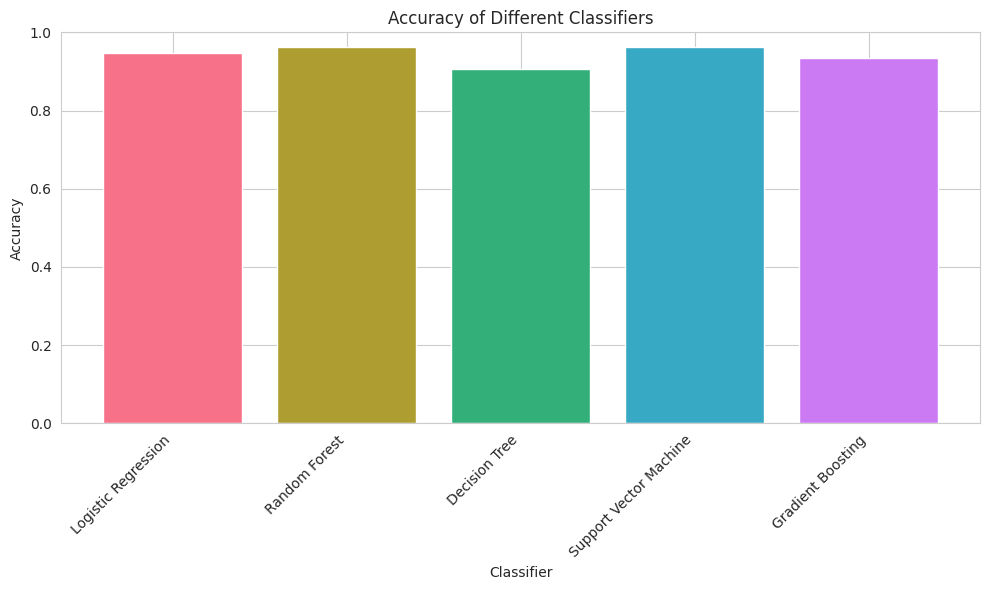

In [ ]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score

# Suppress warnings
warnings.filterwarnings("ignore")

# Set seaborn style
sns.set_style("whitegrid")

# Dictionary to store accuracy scores
accuracy_scores = {}

# Iterate over each classifier
for name, classifier in classifiers.items():
    # Train the model on the training data
    classifier.fit(list(X_train), y_train)

    # Predict on the testing data
    y_pred = classifier.predict(list(X_test))

    # Compute accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Store accuracy score
    accuracy_scores[name] = accuracy

# Plotting the bar graph
plt.figure(figsize=(10, 6))

# Use seaborn color palette
colors = sns.color_palette("husl", len(accuracy_scores))

plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=colors)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
# Iterate over each classifier
for name, classifier in classifiers.items():
    print(f"--- {name} ---")

    # Train the model on the training data
    classifier.fit(list(X_train), y_train)

    # Predict on the testing data
    y_pred = classifier.predict(list(X_test))

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print confusion matrix
    print("Confusion Matrix:")
    print(cm)
    print()


--- Logistic Regression ---
Confusion Matrix:
[[4387  263]
 [ 207 4123]]

--- Random Forest ---
Confusion Matrix:
[[4490  160]
 [ 180 4150]]

--- Decision Tree ---
Confusion Matrix:
[[4312  338]
 [ 518 3812]]

--- Support Vector Machine ---
Confusion Matrix:
[[4445  205]
 [ 134 4196]]

--- Gradient Boosting ---
Confusion Matrix:
[[4326  324]
 [ 256 4074]]



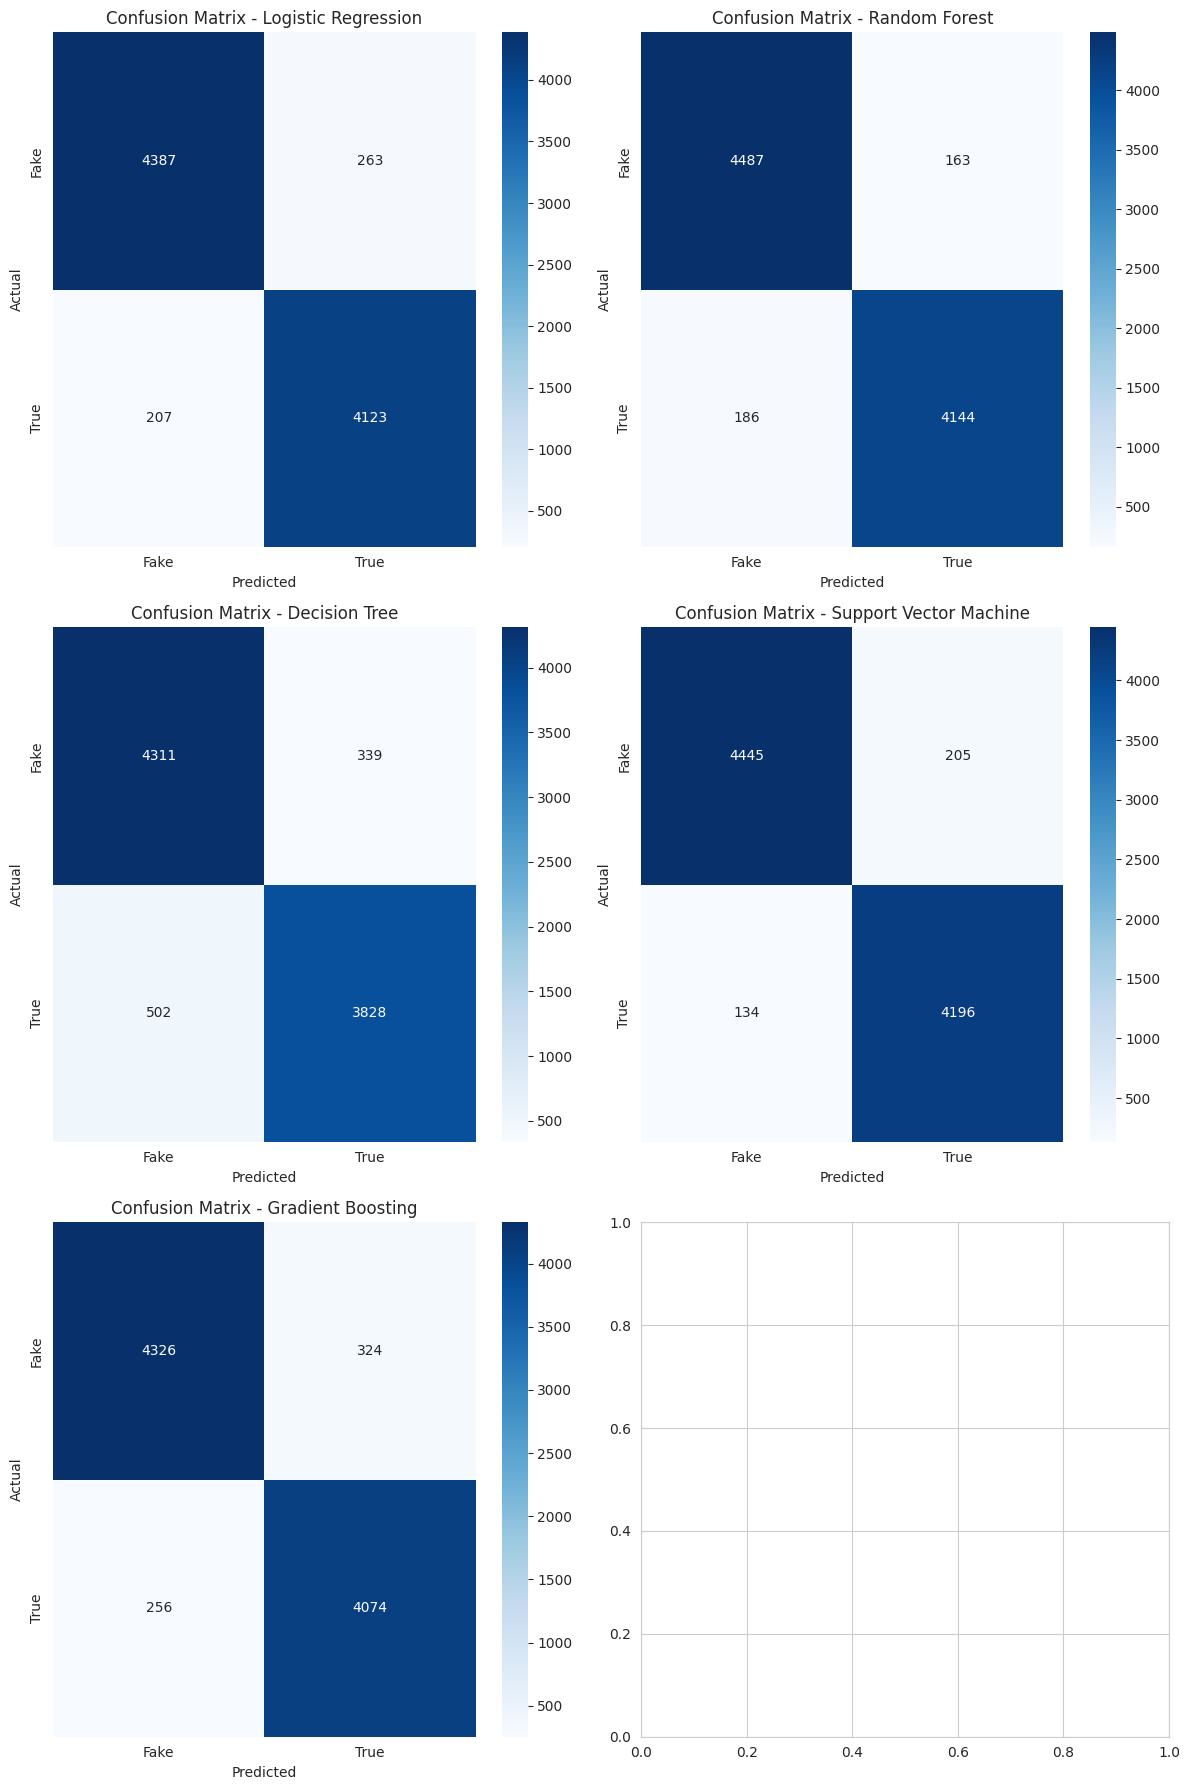

In [ ]:
# Calculate number of classifiers
num_classifiers = len(classifiers)

# Calculate number of rows and columns for subplots
num_rows = (num_classifiers + 1) // 2  # Add 1 to ensure we have enough rows for odd numbers
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 6))

# Flatten axes if only one row
if num_rows == 1:
    axes = [axes]

# Iterate over each classifier
for (name, classifier), ax in zip(classifiers.items(), axes.flatten()):
    # Train the model on the training data
    classifier.fit(list(X_train), y_train)

    # Predict on the testing data
    y_pred = classifier.predict(list(X_test))

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'], ax=ax)
    ax.set_title(f'Confusion Matrix - {name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Adjust layout
plt.tight_layout()
plt.show()


# **Model Building**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib

# Initialize the SVM classifier
svm_classifier = SVC()

# Train the classifier on the training data
svm_classifier.fit(list(X_train), y_train)

# Predict on the testing data
y_pred = svm_classifier.predict(list(X_test))

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='True')
recall = recall_score(y_test, y_pred, pos_label='True')
f1 = f1_score(y_test, y_pred, pos_label='True')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

# Save the trained model
model_path = '/content/drive/MyDrive/ML project/svm_classifier.pkl'
joblib.dump(svm_classifier, model_path)

# Print the path to the saved model
print(f'Saved model at: {model_path}')


Accuracy: 0.9622494432071269
Precision: 0.9534196773460577
Recall: 0.9690531177829099
F1 Score: 0.961172832436147
Confusion Matrix:
[[4445  205]
 [ 134 4196]]
Saved model at: /content/drive/MyDrive/ML project/svm_classifier.pkl


# **Test**

**Real:**High ranking police officials in Louisville, Kentucky, have privately voiced concerns that the felony charge against world No. 1 golfer Scottie Scheffler who reportedly tried to drive around the scene of a fatal crash is excessive, a source familiar with the discussions told CNN.

In [ ]:
import spacy
import joblib

# Load the SpaCy model
nlp = spacy.load('en_core_web_md')

# Load the SVM classifier
svm_classifier = joblib.load('/content/drive/MyDrive/ML project/svm_classifier.pkl')

# Function to preprocess and vectorize a news article
def preprocess_and_vectorize(news, nlp_model):
    doc = nlp_model(news)
    return doc.vector

# Function to check whether a news article is real or fake
def check_news(news, model, nlp_model):
    news_vector = preprocess_and_vectorize(news, nlp_model)
    predicted_label = model.predict([news_vector])[0]
    return predicted_label

# Get news input from the user
user_news = input("Enter the news article: ")

# Check the user-provided news
predicted_label = check_news(user_news, svm_classifier, nlp)
print("Predicted Label:", "Real News" if predicted_label else "Fake News")


Enter the news article: High ranking police officials in Louisville, Kentucky, have privately voiced concerns that the felony charge against world No. 1 golfer Scottie Scheffler who reportedly tried to drive around the scene of a fatal crash is excessive, a source familiar with the discussions told CNN.
Predicted Label: Real News


**Fake**:8 dead after bus carrying farm workers in Florida hit by truck, driver of truck charged with DUI

In [ ]:
import spacy
import joblib

# Load the SpaCy model
nlp = spacy.load('en_core_web_md')

# Load the SVM classifier
svm_classifier = joblib.load('/content/drive/MyDrive/ML project/svm_classifier.pkl')

# Function to preprocess and vectorize a news article
def preprocess_and_vectorize(news, nlp_model):
    doc = nlp_model(news)
    return doc.vector

# Function to check whether a news article is real or fake
def check_news(news, model, nlp_model):
    news_vector = preprocess_and_vectorize(news, nlp_model)
    predicted_label = model.predict([news_vector])[0]
    return predicted_label

# Get news input from the user
user_news = input("Enter the news article: ")

# Check the user-provided news
predicted_label = check_news(user_news, svm_classifier, nlp)
print("Predicted Label:", "Real News" if predicted_label else "Fake News")


Enter the news article: 8 dead after bus carrying farm workers in Florida hit by truck, driver of truck charged with DUI
Predicted Label: Fake News
